Shape: (240, 240, 155)
Data type: float64


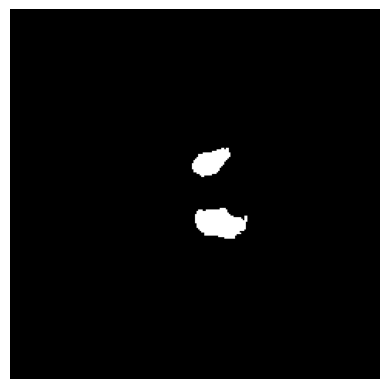

In [12]:
import autorootcwd
import cc3d
import nibabel as nib
import numpy as np

# Load the NIfTI file
nii_img = nib.load('data/BRATS_PED/BraTS-PED-00009-000/BraTS-PED-00009-000-seg.nii.gz')

# Get the data as a numpy array
data = nii_img.get_fdata()

# Print some basic information
print(f"Shape: {data.shape}")
print(f"Data type: {data.dtype}")

# If you want to visualize a slice (assuming it's a 3D image)
import matplotlib.pyplot as plt

plt.imshow(data[:, :, data.shape[2]//2], cmap='gray')
plt.axis('off')
plt.show()

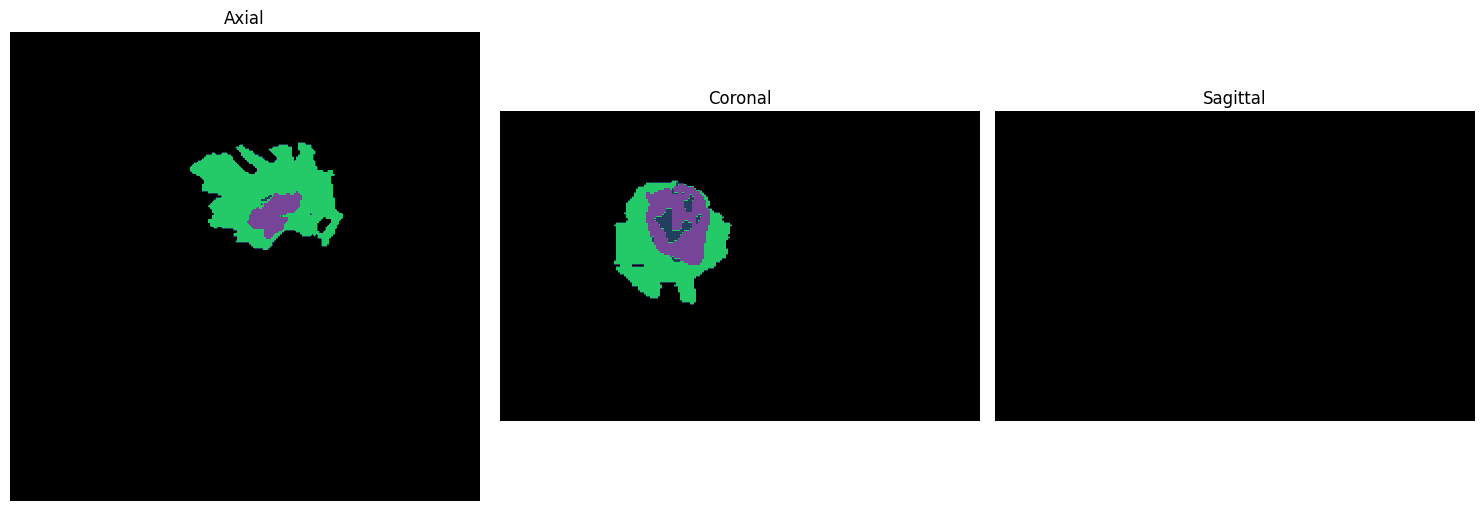

Shape: (240, 240, 155)
Data type: float64
Unique values: [0. 1. 2. 3.]


In [16]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Load the NIfTI file
nii_img = nib.load('data/BRATS_PED/BraTS-PED-00025-000/BraTS-PED-00025-000-seg.nii.gz')
data = nii_img.get_fdata()

# Get unique values and create a random colormap
unique_values = np.unique(data)
n_colors = len(unique_values)
colors = np.random.rand(n_colors, 3)
colors[0] = [0, 0, 0]  # Set background (label 0) to black
cmap = ListedColormap(colors)

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Axial view (top-down)
ax1.imshow(data[:, :, data.shape[2]//2], cmap=cmap, vmin=0, vmax=n_colors-1)
ax1.set_title('Axial')
ax1.axis('off')

# Coronal view (front-back)
ax2.imshow(data[:, data.shape[1]//2, :].T, cmap=cmap, vmin=0, vmax=n_colors-1)
ax2.set_title('Coronal')
ax2.axis('off')

# Sagittal view (side)
ax3.imshow(data[data.shape[0]//2, :, :].T, cmap=cmap, vmin=0, vmax=n_colors-1)
ax3.set_title('Sagittal')
ax3.axis('off')

plt.tight_layout()
plt.show()

# Print some basic information
print(f"Shape: {data.shape}")
print(f"Data type: {data.dtype}")
print(f"Unique values: {unique_values}")

In [50]:
out = cc3d.connected_components((data==1), connectivity=6)
out = cc3d.dust(out, threshold=500)

out2 = (data == 1)


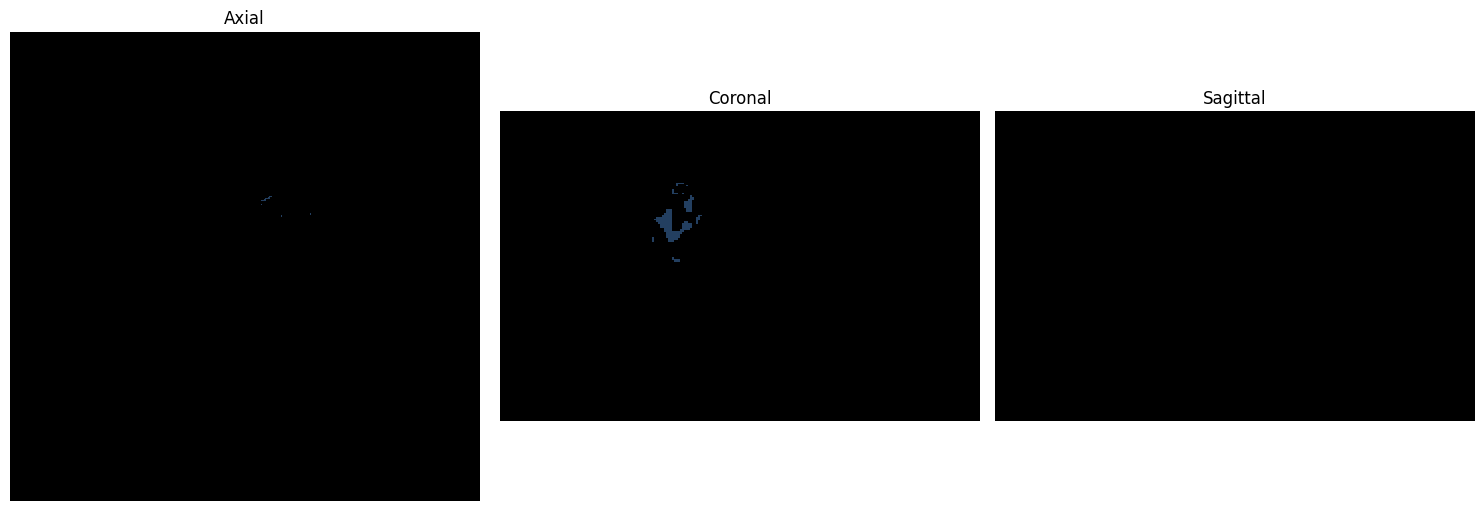

In [45]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Axial view (top-down)
ax1.imshow(out2[:, :, out.shape[2]//2], cmap=cmap, vmin=0, vmax=n_colors-1)
ax1.set_title('Axial')
ax1.axis('off')

# Coronal view (front-back)
ax2.imshow(out2[:, out.shape[1]//2, :].T, cmap=cmap, vmin=0, vmax=n_colors-1)
ax2.set_title('Coronal')
ax2.axis('off')

# Sagittal view (side)
ax3.imshow(out2[out.shape[0]//2, :, :].T, cmap=cmap, vmin=0, vmax=n_colors-1)
ax3.set_title('Sagittal')
ax3.axis('off')

plt.tight_layout()
plt.show()

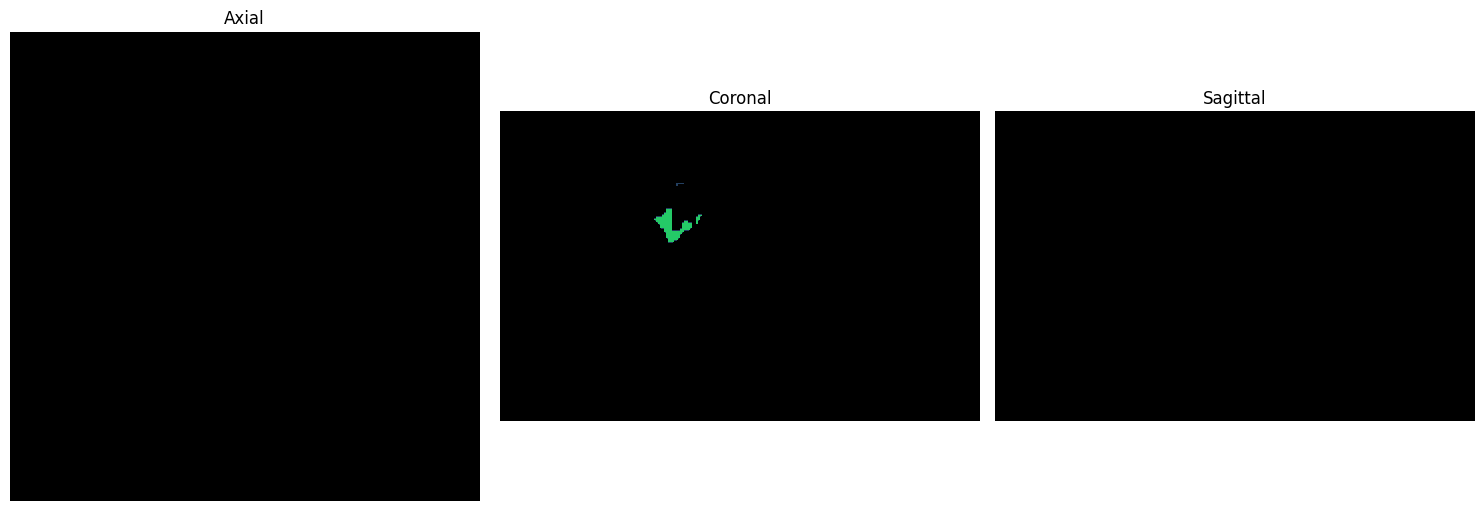

In [58]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Axial view (top-down)
ax1.imshow(out_largest[:, :, out.shape[2]//2], cmap=cmap, vmin=0, vmax=n_colors-1)
ax1.set_title('Axial')
ax1.axis('off')

# Coronal view (front-back)
ax2.imshow(out_largest[:, out.shape[1]//2, :].T, cmap=cmap, vmin=0, vmax=n_colors-1)
ax2.set_title('Coronal')
ax2.axis('off')

# Sagittal view (side)
ax3.imshow(out_largest[out.shape[0]//2, :, :].T, cmap=cmap, vmin=0, vmax=n_colors-1)
ax3.set_title('Sagittal')
ax3.axis('off')

plt.tight_layout()
plt.show()


In [54]:
unique_values = np.unique(out)
print(f"Unique values: {unique_values}")


Unique values: [0 1 8]


In [56]:
out_largest = cc3d.largest_k(out, k=3)

In [57]:
unique_values = np.unique(out_largest)
print(f"Unique values: {unique_values}")

Unique values: [0 1 2]


In [51]:
stats = cc3d.statistics(out)

In [52]:
stats

{'voxel_counts': array([8921924,     543,       0,       0,       0,       0,       0,
              0,    5533], dtype=uint32),
 'bounding_boxes': [(slice(0, 240, None),
   slice(0, 240, None),
   slice(0, 155, None)),
  (slice(72, 92, None), slice(120, 143, None), slice(36, 42, None)),
  (slice(65535, 1, None), slice(65535, 1, None), slice(65535, 1, None)),
  (slice(65535, 1, None), slice(65535, 1, None), slice(65535, 1, None)),
  (slice(65535, 1, None), slice(65535, 1, None), slice(65535, 1, None)),
  (slice(65535, 1, None), slice(65535, 1, None), slice(65535, 1, None)),
  (slice(65535, 1, None), slice(65535, 1, None), slice(65535, 1, None)),
  (slice(65535, 1, None), slice(65535, 1, None), slice(65535, 1, None)),
  (slice(72, 103, None), slice(109, 148, None), slice(43, 75, None))],
 'centroids': array([[119.52204435, 119.49292249,  77.01242109],
        [ 80.06629834, 129.80110497,  38.55064457],
        [         nan,          nan,          nan],
        [         nan,          n